In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, learning_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data
df = pd.read_csv('../data/energy_data_cleaned.csv')

In [3]:
y = df['target']
X = df.drop(columns=['target', 'timestamp'])



In [4]:
# Splitting the data into train, validation, and test sets (60% train, 20% validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)


In [5]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [6]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Predictions
y_pred_train = rf.predict(X_train)
y_pred_valid = rf.predict(X_valid)
y_pred_test = rf.predict(X_test)


In [8]:
# Metrics
train_mae = mean_absolute_error(y_train, y_pred_train)
valid_mae = mean_absolute_error(y_valid, y_pred_valid)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_mse = mean_squared_error(y_train, y_pred_train)
valid_mse = mean_squared_error(y_valid, y_pred_valid)
test_mse = mean_squared_error(y_test, y_pred_test)

train_rmse = np.sqrt(train_mse)
valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_pred_train)
valid_r2 = r2_score(y_valid, y_pred_valid)
test_r2 = r2_score(y_test, y_pred_test)

# Print metrics
print("Random Forest Regressor Performance:")
print("=====================================")
print(f"Train - MAE: {train_mae:.4f}, MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")
print(f"Validation - MAE: {valid_mae:.4f}, MSE: {valid_mse:.4f}, RMSE: {valid_rmse:.4f}, R²: {valid_r2:.4f}")
print(f"Test - MAE: {test_mae:.4f}, MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")

Random Forest Regressor Performance:
Train - MAE: 0.0276, MSE: 0.0036, RMSE: 0.0597, R²: 0.9987
Validation - MAE: 0.0738, MSE: 0.0253, RMSE: 0.1591, R²: 0.9904
Test - MAE: 0.0734, MSE: 0.0248, RMSE: 0.1576, R²: 0.9906


/opt/anaconda3/envs/bolsa/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


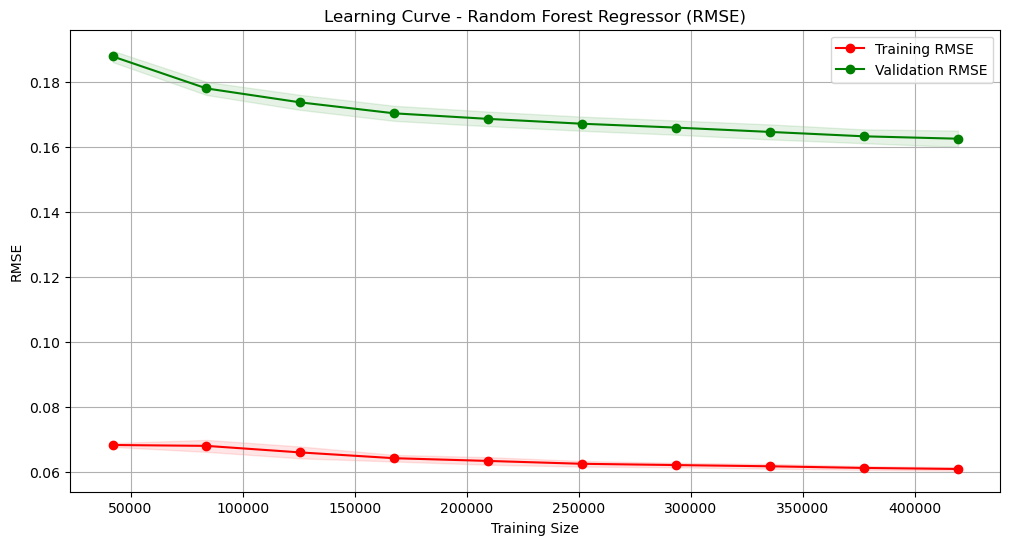

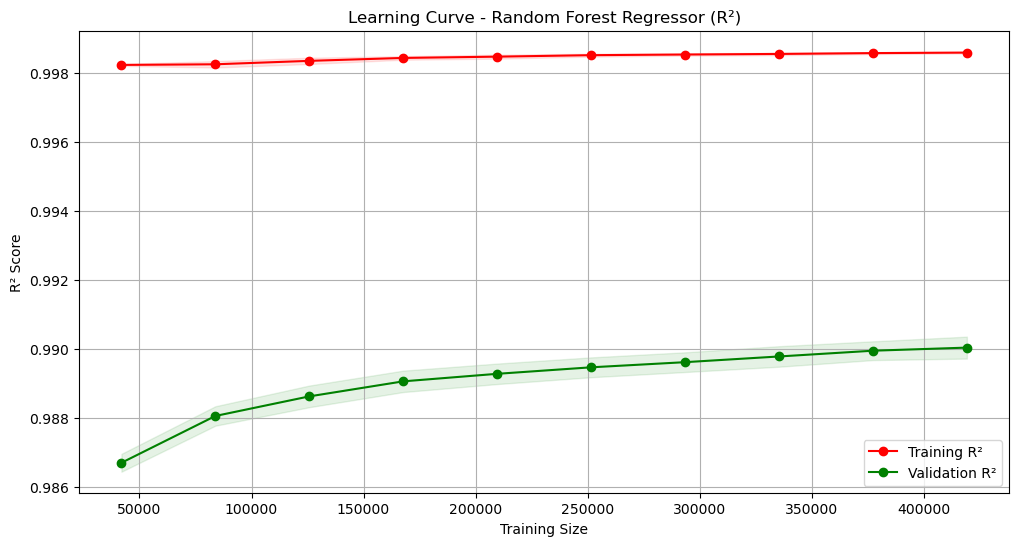

In [9]:
# Curva de Aprendizado - RMSE
train_sizes_rmse, train_scores_rmse, valid_scores_rmse = learning_curve(
    estimator=rf,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=3,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

# Convertendo para valores positivos
train_scores_rmse_mean = -np.mean(train_scores_rmse, axis=1)
train_scores_rmse_std = np.std(train_scores_rmse, axis=1)
valid_scores_rmse_mean = -np.mean(valid_scores_rmse, axis=1)
valid_scores_rmse_std = np.std(valid_scores_rmse, axis=1)

# Plot RMSE
plt.figure(figsize=(12, 6))
plt.title("Learning Curve - Random Forest Regressor (RMSE)")
plt.xlabel("Training Size")
plt.ylabel("RMSE")
plt.grid()
plt.fill_between(train_sizes_rmse, train_scores_rmse_mean - train_scores_rmse_std,
                 train_scores_rmse_mean + train_scores_rmse_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_rmse, valid_scores_rmse_mean - valid_scores_rmse_std,
                 valid_scores_rmse_mean + valid_scores_rmse_std, alpha=0.1, color="g")
plt.plot(train_sizes_rmse, train_scores_rmse_mean, 'o-', color="r", label="Training RMSE")
plt.plot(train_sizes_rmse, valid_scores_rmse_mean, 'o-', color="g", label="Validation RMSE")
plt.legend(loc="best")
plt.show()


# Curva de Aprendizado - R²
train_sizes_r2, train_scores_r2, valid_scores_r2 = learning_curve(
    estimator=rf,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=3,
    n_jobs=-1,
    scoring='r2'
)

train_scores_r2_mean = np.mean(train_scores_r2, axis=1)
train_scores_r2_std = np.std(train_scores_r2, axis=1)
valid_scores_r2_mean = np.mean(valid_scores_r2, axis=1)
valid_scores_r2_std = np.std(valid_scores_r2, axis=1)

# Plot R²
plt.figure(figsize=(12, 6))
plt.title("Learning Curve - Random Forest Regressor (R²)")
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.grid()
plt.fill_between(train_sizes_r2, train_scores_r2_mean - train_scores_r2_std,
                 train_scores_r2_mean + train_scores_r2_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_r2, valid_scores_r2_mean - valid_scores_r2_std,
                 valid_scores_r2_mean + valid_scores_r2_std, alpha=0.1, color="g")
plt.plot(train_sizes_r2, train_scores_r2_mean, 'o-', color="r", label="Training R²")
plt.plot(train_sizes_r2, valid_scores_r2_mean, 'o-', color="g", label="Validation R²")
plt.legend(loc="best")
plt.show()


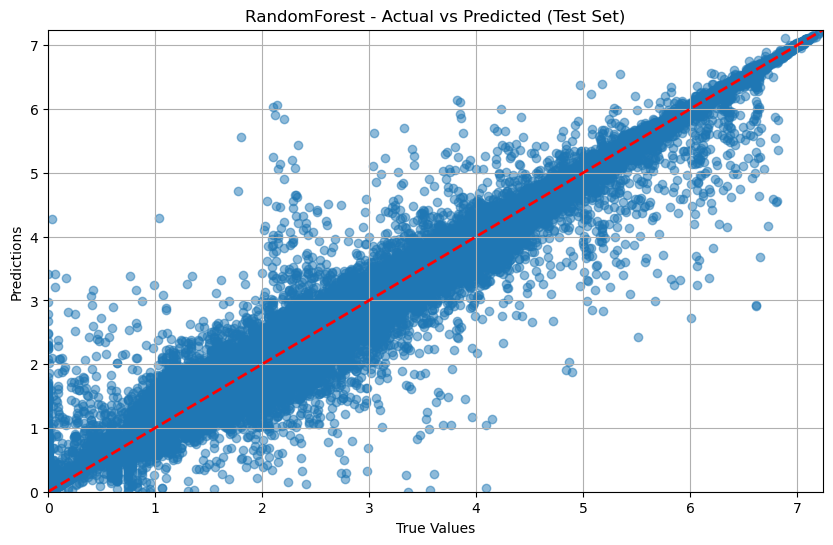

In [10]:
# Plotting Actual vs Predicted (Test set)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title(f"RandomForest - Actual vs Predicted (Test Set)")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()

In [11]:
hyperparameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Randomized Search CV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=hyperparameters,
                               n_iter=20, cv=3, verbose=1, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Hyperparameters from RandomizedSearchCV:")
print(random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/anaconda3/envs/bolsa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/bolsa/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/bolsa/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/bolsa/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  Fi

Best Hyperparameters from RandomizedSearchCV:
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}


In [12]:
best_rf = random_search.best_estimator_

In [13]:
y_pred_train_best = best_rf.predict(X_train)
y_pred_valid_best = best_rf.predict(X_valid)
y_pred_test_best = best_rf.predict(X_test)

In [14]:
# Metrics for the best model
train_mae_best = mean_absolute_error(y_train, y_pred_train_best)
valid_mae_best = mean_absolute_error(y_valid, y_pred_valid_best)
test_mae_best = mean_absolute_error(y_test, y_pred_test_best)

train_mse_best = mean_squared_error(y_train, y_pred_train_best)
valid_mse_best = mean_squared_error(y_valid, y_pred_valid_best)
test_mse_best = mean_squared_error(y_test, y_pred_test_best)

train_rmse_best = np.sqrt(train_mse_best)
valid_rmse_best = np.sqrt(valid_mse_best)
test_rmse_best = np.sqrt(test_mse_best)

train_r2_best = r2_score(y_train, y_pred_train_best)
valid_r2_best = r2_score(y_valid, y_pred_valid_best)
test_r2_best = r2_score(y_test, y_pred_test_best)

# Print metrics for the best model
print("\nMetrics for the Best Model:")
print("=====================================")
print(f"Train - MAE: {train_mae_best:.4f}, MSE: {train_mse_best:.4f}, RMSE: {train_rmse_best:.4f}, R²: {train_r2_best:.4f}")
print(f"Validation - MAE: {valid_mae_best:.4f}, MSE: {valid_mse_best:.4f}, RMSE: {valid_rmse_best:.4f}, R²: {valid_r2_best:.4f}")
print(f"Test - MAE: {test_mae_best:.4f}, MSE: {test_mse_best:.4f}, RMSE: {test_rmse_best:.4f}, R²: {test_r2_best:.4f}")


Metrics for the Best Model:
Train - MAE: 0.0391, MSE: 0.0074, RMSE: 0.0859, R²: 0.9972
Validation - MAE: 0.0746, MSE: 0.0238, RMSE: 0.1543, R²: 0.9910
Test - MAE: 0.0744, MSE: 0.0237, RMSE: 0.1541, R²: 0.9910


/opt/anaconda3/envs/bolsa/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


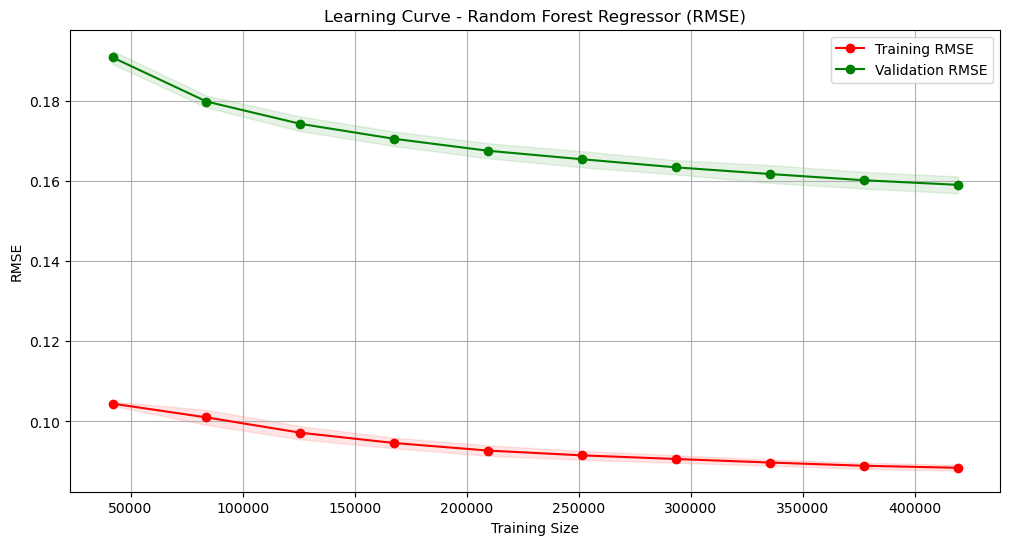

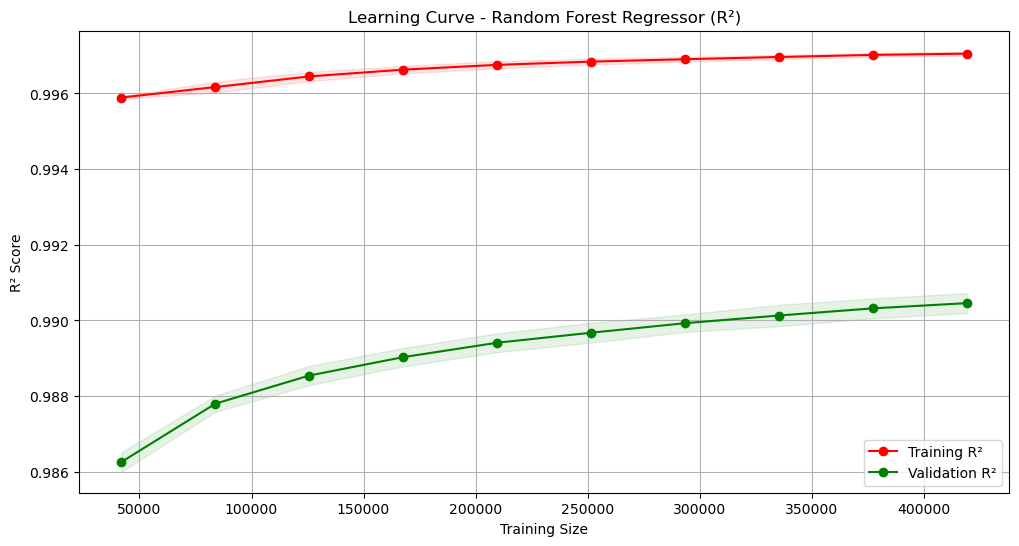

In [15]:
# Curva de Aprendizado - RMSE
train_sizes_rmse, train_scores_rmse, valid_scores_rmse = learning_curve(
    estimator=best_rf,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=3,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

# Convertendo para valores positivos
train_scores_rmse_mean = -np.mean(train_scores_rmse, axis=1)
train_scores_rmse_std = np.std(train_scores_rmse, axis=1)
valid_scores_rmse_mean = -np.mean(valid_scores_rmse, axis=1)
valid_scores_rmse_std = np.std(valid_scores_rmse, axis=1)

# Plot RMSE
plt.figure(figsize=(12, 6))
plt.title("Learning Curve - Random Forest Regressor (RMSE)")
plt.xlabel("Training Size")
plt.ylabel("RMSE")
plt.grid()
plt.fill_between(train_sizes_rmse, train_scores_rmse_mean - train_scores_rmse_std,
                 train_scores_rmse_mean + train_scores_rmse_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_rmse, valid_scores_rmse_mean - valid_scores_rmse_std,
                 valid_scores_rmse_mean + valid_scores_rmse_std, alpha=0.1, color="g")
plt.plot(train_sizes_rmse, train_scores_rmse_mean, 'o-', color="r", label="Training RMSE")
plt.plot(train_sizes_rmse, valid_scores_rmse_mean, 'o-', color="g", label="Validation RMSE")
plt.legend(loc="best")
plt.show()


# Curva de Aprendizado - R²
train_sizes_r2, train_scores_r2, valid_scores_r2 = learning_curve(
    estimator=best_rf,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=3,
    n_jobs=-1,
    scoring='r2'
)

train_scores_r2_mean = np.mean(train_scores_r2, axis=1)
train_scores_r2_std = np.std(train_scores_r2, axis=1)
valid_scores_r2_mean = np.mean(valid_scores_r2, axis=1)
valid_scores_r2_std = np.std(valid_scores_r2, axis=1)

# Plot R²
plt.figure(figsize=(12, 6))
plt.title("Learning Curve - Random Forest Regressor (R²)")
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.grid()
plt.fill_between(train_sizes_r2, train_scores_r2_mean - train_scores_r2_std,
                 train_scores_r2_mean + train_scores_r2_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_r2, valid_scores_r2_mean - valid_scores_r2_std,
                 valid_scores_r2_mean + valid_scores_r2_std, alpha=0.1, color="g")
plt.plot(train_sizes_r2, train_scores_r2_mean, 'o-', color="r", label="Training R²")
plt.plot(train_sizes_r2, valid_scores_r2_mean, 'o-', color="g", label="Validation R²")
plt.legend(loc="best")
plt.show()


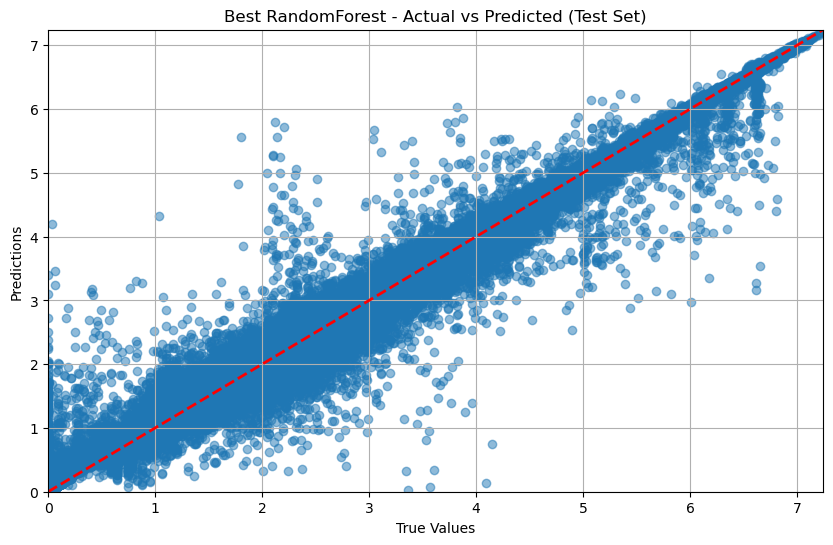

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.title(f"Best RandomForest - Actual vs Predicted (Test Set)")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()


K-Fold Cross Validation Results:
Mean R²: 0.9907
Mean MAE: 0.0762
Mean MSE: 0.0246
Mean RMSE: 0.1569


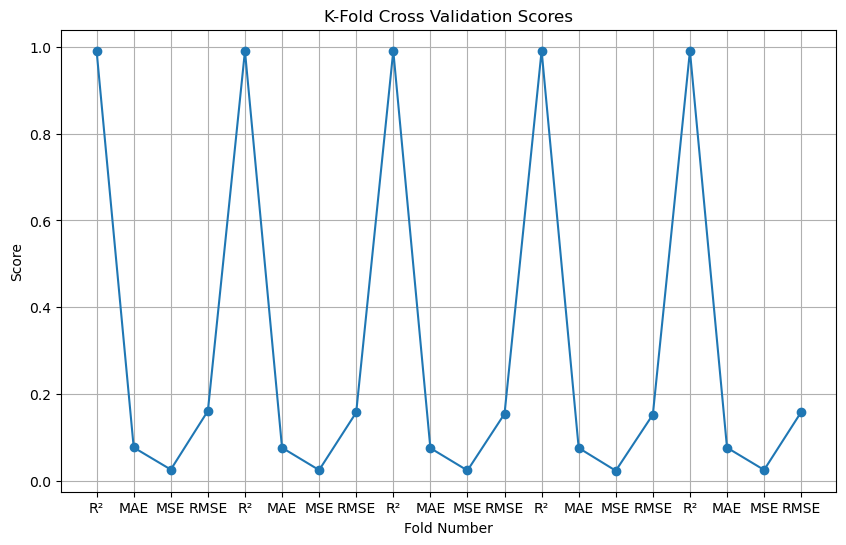

In [17]:
# K-Fold Cross Validation to evaluate the best model
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
kfold_scores = []

for train_index, val_index in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    best_rf.fit(X_train_fold, y_train_fold)
    y_val_pred_fold = best_rf.predict(X_val_fold)
    
    kfold_scores.append(r2_score(y_val_fold, y_val_pred_fold))
    kfold_scores.append(mean_absolute_error(y_val_fold, y_val_pred_fold))
    kfold_scores.append(mean_squared_error(y_val_fold, y_val_pred_fold))
    kfold_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_val_pred_fold)))

# Print K-Fold Cross Validation results
print("\nK-Fold Cross Validation Results:")
print("=====================================")
print(f"Mean R²: {np.mean(kfold_scores[0::4]):.4f}")
print(f"Mean MAE: {np.mean(kfold_scores[1::4]):.4f}")
print(f"Mean MSE: {np.mean(kfold_scores[2::4]):.4f}")
print(f"Mean RMSE: {np.mean(kfold_scores[3::4]):.4f}")

# Plotting scores from K-Fold Cross Validation 

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(kfold_scores)+1), kfold_scores, marker='o')
plt.title('K-Fold Cross Validation Scores')
plt.xlabel('Fold Number')
plt.ylabel('Score')
plt.xticks(range(1, len(kfold_scores)+1), ['R²', 'MAE', 'MSE', 'RMSE']*5)
plt.grid()
plt.show()